In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
# import tensorflow as tf
from sentence_transformers import SentenceTransformer

/Users/bookerschelhaas/miniconda3/envs/ai-design/lib/python3.11/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


AttributeError: module 'torch.utils._pytree' has no attribute 'register_pytree_node'

In [2]:
df = pd.read_csv('Need Sorting Data Analysis - cleaned data.csv')

In [3]:
df

,Unnamed: 0,Participant #,exp_control,video,User needs 1,User needs 2,Age,Gender,Education,Design experience,UX experience,Q138
0,DONE,1,exp,desk,Place for putting bags;\nNot bothering other c...,Having a clear space to navigate moving things...,26-41,Male,"Graduate or professional degree (MA, MS, MBA, ...",I have a lot of experience,I have a lot of experience,NaN
1,DONE,2,control,desk,easier way to manipulate/connect monitor cable...,to find good screen setup (i.e. monitor and la...,18-25,Female,"Some college, but no degree",I have some experience,I have little experience,NaN
2,DONE,3,exp,vacuum,A vacuum cleaner with a more manageable power ...,A more ergonomic vacuum handle/overall design;...,18-25,Female,"Some college, but no degree",I have some experience,I have a lot of experience,NaN
3,DONE,4,control,vacuum,a way to vacuum space with different obstacles...,Cord organization method while user is vacuumi...,18-25,Female,"Some college, but no degree",I have some experience,I have little experience,NaN
4,DONE,5,exp,desk,to find places to set up equipment;\nhelp find...,more space on desk;\n better placement of stuf...,18-25,Male,"Some college, but no degree",I have little experience,I have no experience,NaN
5,DONE,6,control,desk,a keyboard as they seem to work a lot with onl...,access to the internet to be able to see the s...,18-25,Male,"Some college, but no degree",I have some experience,I have some experience,NaN
6,DONE,7,exp,vacuum,Can move product around while using;\nIntuitiv...,Should be able to use without moving around to...,18-25,Female,"Some college, but no degree",I have little experience,I have little experience,NaN
7,DONE,8,control,vacuum,Better storage system of chord;\nChord require...,a better storage system for vacuum;\n Looks li...,18-25,Female,"Some college, but no degree",I have some experience,I have little experience,NaN
8,DONE,9,exp,desk,an ergonomic computer workstation;\na PC that ...,A clear floor around the workstation;\n Long c...,18-25,Female,Bachelor’s degree,I have a lot of experience,I have some experience,NaN
9,DONE,11,exp,vacuum,retracting cord reel;\nbattery powered and cor...,low tension continuous retracting cord reel wh...,18-25,Male,Bachelor’s degree,I have a lot of experience,I have some experience,NaN


In [4]:
part_num_data = df['Participant #']
exp_cont = df['exp_control']
bar_color = ['red' if label=='exp' else 'blue' for label in exp_cont]
needs_part_1 = df['User needs 1']
needs_part_2 = df['User needs 2']


In [5]:
participant_need_dict = {}
part_1_total_needs = []
part_2_total_needs = []
total_needs = []
all_needs = []
for i,part_num in enumerate(part_num_data):
    participant_need_dict[part_num] = {'exp_control':exp_cont[i]}
    participant_need_dict[part_num]['part_1_needs'] = needs_part_1[i].split(';\n')
    participant_need_dict[part_num]['part_1_needs_total'] = len(participant_need_dict[part_num]['part_1_needs'])
    participant_need_dict[part_num]['part_2_needs'] = needs_part_2[i].split(';\n ')
    participant_need_dict[part_num]['part_2_needs_total'] = len(participant_need_dict[part_num]['part_2_needs'])
    all_needs += participant_need_dict[part_num]['part_1_needs'] + participant_need_dict[part_num]['part_2_needs']
    part_1_total_needs.append(participant_need_dict[part_num]['part_1_needs_total'])
    part_2_total_needs.append(participant_need_dict[part_num]['part_2_needs_total'])
    total_needs.append(participant_need_dict[part_num]['part_1_needs_total']+participant_need_dict[part_num]['part_2_needs_total'])


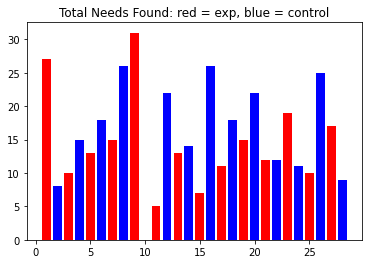

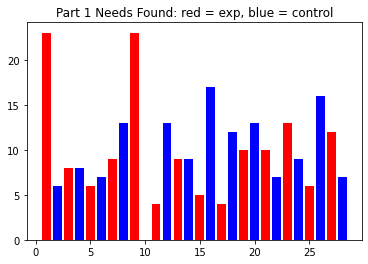

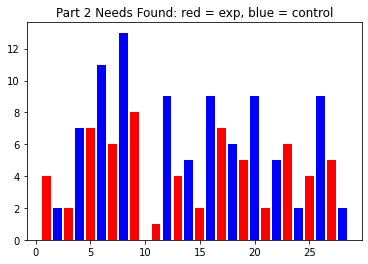

In [6]:
plt.bar(part_num_data,total_needs,color = bar_color)
plt.title('Total Needs Found: red = exp, blue = control')
plt.show()

plt.bar(part_num_data,part_1_total_needs,color = bar_color)
plt.title('Part 1 Needs Found: red = exp, blue = control')
plt.show()

plt.bar(part_num_data,part_2_total_needs,color = bar_color)
plt.title('Part 2 Needs Found: red = exp, blue = control')
plt.show()

In [5]:
# Load the BERT model
bert_model = tf.keras.models.load_model('bert_uncased.h5')

# Encode the two sentences
sentence_1 = 'I love dogs.'
sentence_2 = 'I adore cats.'

sentence_1_embedding = bert_model.predict([sentence_1])
sentence_2_embedding = bert_model.predict([sentence_2])

# Calculate the cosine similarity
cosine_similarity = tf.keras.metrics.cosine_similarity(sentence_1_embedding, sentence_2_embedding)

# Print the cosine similarity
print(cosine_similarity)

ValueError: No model config found in the file at bert_uncased.h5.

In [6]:
from transformers import BertTokenizer, TFBertModel


: 

: 